### Exploratory Analysis of House Prices

#### 1. **Initial Data Exploration**
- The dataset contains **2,000 records** of house prices, with features such as **Number of Bedrooms**, **Number of bathrooms**, **Square Footage**, **location**, **condition**, **garage presence**, and **year built**.
- Data inspection revealed that there are no missing values in the dataset, particularly in the **'Garage'** column, which indicates that every house in the dataset specifies whether it has a garage or not.

#### 2. **Distribution of Houses with and without Garages**
- The **distribution of houses with garages** (962 houses, 48.1%) is slightly less than those **without garages** (1,038 houses, 51.9%).
- A pie chart was used to display the proportion of houses with and without garages. The visualization indicates that the difference is relatively small, showing nearly an even split.

#### 3. **Impact of Garage Presence on House Prices**
- The average house prices for homes **with and without garages** were compared using summary statistics and visualizations:
  - Houses with garages tend to have a slightly higher average price compared to those without garages.
  - A bar chart depicting the **average house price** for houses with and without garages confirmed this observation.
  - The one-way ANOVA test for garage presence showed that the **p-value** was **0.89**, suggesting that the difference in average prices is not statistically significant at the 95% confidence level. Therefore, having a garage may not have a strong effect on house prices in this dataset.

#### 4. **Distribution of House Prices with and without Garages**
- A **histogram** comparing the distribution of house prices for houses with and without garages shows that the distributions are similar, with house prices spread across all price ranges.
- The histogram and quartile analysis further illustrate the range and distribution of house prices, indicating a broader spread of house prices among homes with garages.

#### 5. **Average House Price Over Time: With vs. Without Garages**
- A **line plot** was used to examine how average house prices have changed over time (based on the year built) for houses with and without garages.
  - The plot shows that average prices fluctuate significantly over the years for both categories, with no clear or consistent trend of one category having consistently higher prices than the other.
  - In some years, houses with garages tend to have slightly higher average prices compared to houses without garages, while in other years, houses without garages have similar or even slightly higher prices.
  - The overlapping lines suggest that garage presence does not have a significant impact on house prices over time, as the trends are very similar.

#### 6. **Outliers in House Prices**
- Outliers in house prices were identified using the **Interquartile Range (IQR)** method:
  - There were **no outliers detected** for both houses **with** and **without garages**.

#### 7. **Correlation between Garage Presence and House Prices**
- A scatter plot was created to explore the relationship between **garage presence** (as a binary value) and **house prices**.
  - A linear regression line was added to the scatter plot, showing a **horizontal line**, which corresponds to a **correlation coefficient of 0.0**.
  - This indicates that there is **no correlation** between garage presence and house prices.
  - The **p-value** was **0.89**, meaning that the result is not statistically significant.

#### 8. **Analysis by Location**
- The dataset was further analyzed to understand the impact of **location** on house prices:
  - The distribution of houses by location (**Downtown, Rural, Suburban, and Urban**) was visualized using a stacked bar chart that included garage presence.
  - In terms of garage presence across locations, the percentage distribution showed no significant difference between locations regarding the presence of garages.
- The average house price by **location and garage presence** was visualized:
  - Houses in **Downtown** and **Suburban** locations generally have higher average prices than those in **Rural** and **Urban** areas.
  - In **Downtown** and **Rural** locations, houses with garages had slightly higher average prices than those without garages. However, in **Suburban** and **Urban** areas, houses without garages had slightly higher average prices than those with garages.

#### 9. **Overall Observations**
- The analysis indicates that **garage presence** has a weak influence on house prices, as evidenced by the **slightly higher average prices** for houses with garages, though not statistically significant.
- This dataset does not reveal any major factors that lead to statistically significant variations in house prices, suggesting that other variables (e.g., house condition, area, or year built) might play a more substantial role in determining house prices.

### Conclusion
The analysis of this dataset suggests that **garage presence** does not have a significant influence on house prices, based on statistical tests and visualizations.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import f_oneway
from pathlib import Path

In [33]:
# File to Load _to_load
house_path = Path ("data/House_Price_Prediction_Dataset.csv")

In [34]:
# Read House Price Data File and store into Pandas DataFrames
house_df = pd.read_csv(house_price_prediction_dataset_to_load)

In [35]:
# Display the first few rows of the dataset 
house_df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [36]:
# Count the total number of IDs
total_ids = house_data['Id'].count()

# Count the number of unique IDs
unique_ids = house_data['Id'].nunique()

# Print the results
print(f"Total number of IDs: {total_ids}")
print(f"Number of unique IDs: {unique_ids}")

# Check if there are duplicate IDs
duplicate_ids = total_ids - unique_ids
print(f"Number of duplicate IDs: {duplicate_ids}")


Total number of IDs: 2000
Number of unique IDs: 2000
Number of duplicate IDs: 0


In [37]:
# Display information about the dataset, including data types and non-null counts
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              2000 non-null   int64 
 1   Area            2000 non-null   int64 
 2   Bedrooms        2000 non-null   int64 
 3   Bathrooms       2000 non-null   int64 
 4   Floors          2000 non-null   int64 
 5   YearBuilt       2000 non-null   int64 
 6   Location        2000 non-null   object
 7   Condition       2000 non-null   object
 8   Garage          2000 non-null   object
 9   Price           2000 non-null   int64 
 10  Garage_Numeric  2000 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 172.0+ KB


In [38]:
# Count the number of houses with and without a garage
garage_counts = house_data['Garage'].value_counts()

# Display the results
print(garage_counts)


Garage
No     1038
Yes     962
Name: count, dtype: int64


In [39]:
# Using the aggregation method to generate summary statistics for house prices by garage presence
summary_stats_df = house_data.groupby('Garage')['Price'].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)

# Display the summary statistics
summary_stats_df

,Mean,Median,Variance,Std_Dev,SEM
Garage,,,,,
No,536920.700385,542865.5,7.742101e+10,278246.304279,8636.359814
Yes,538492.747401,533877.0,7.540331e+10,274596.636620,8853.350896


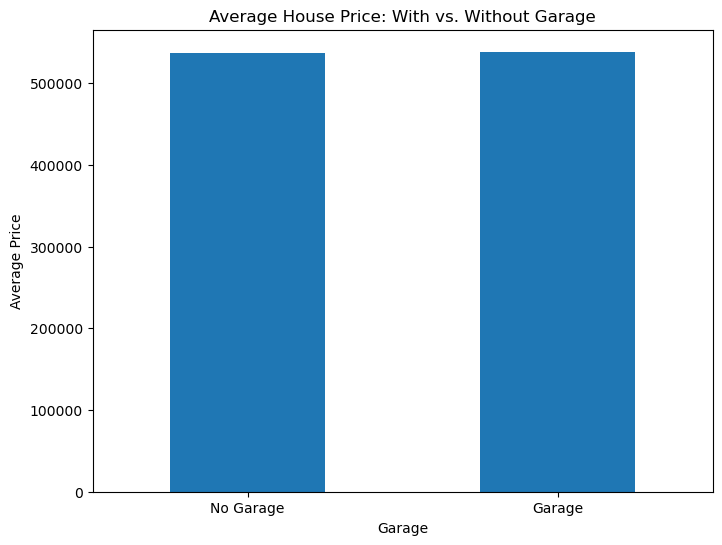

In [40]:
# Calculate the average house price based on garage presence
garage_price_comparison = house_data.groupby('Garage')['Price'].mean()

# Now plot the bar chart
garage_price_comparison.plot(kind='bar', figsize=(8, 6))
plt.title("Average House Price: With vs. Without Garage")
plt.xlabel("Garage")
plt.ylabel("Average Price")
plt.xticks(ticks=[0, 1], labels=['No Garage', 'Garage'], rotation=0)

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Bar_plot.png', format='png', dpi=300)

# Show the plot
plt.show()

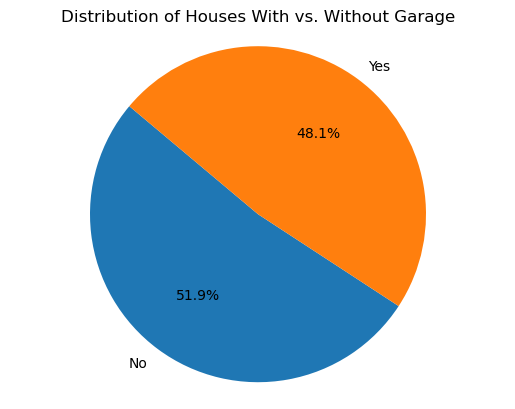

In [41]:
# Get the count of houses with and without a garage
garage_counts = house_data['Garage'].value_counts()

# Make the pie chart based on garage presence
garage_pie = garage_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    title='Distribution of Houses With vs. Without Garage',
    ylabel=''  # Set ylabel to empty to avoid label overlap
)

# Make the axis equal to ensure the pie chart is circular
plt.axis('equal')

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Pie_plot.png', format='png', dpi=300)

# Show the plot
plt.show()


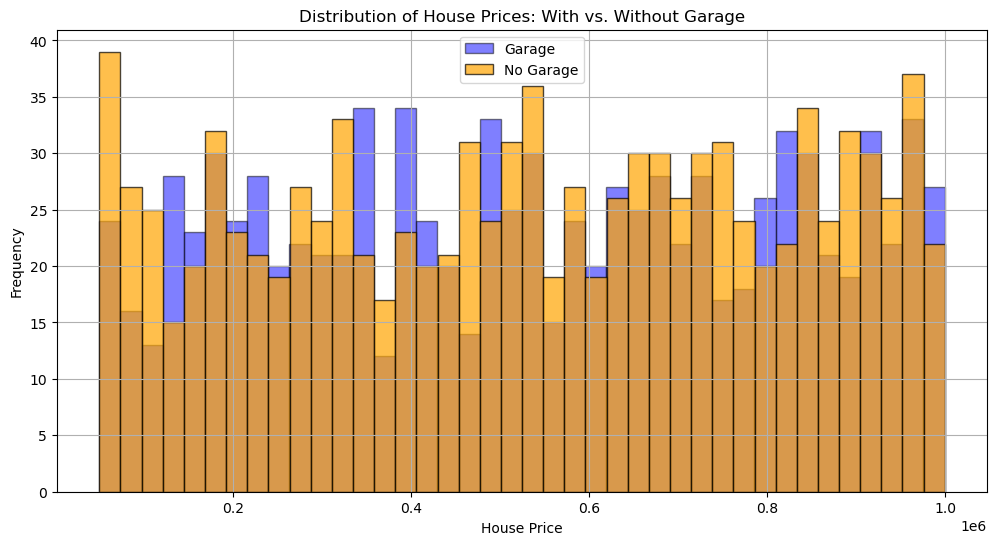

In [42]:
# Plotting a histogram to compare the distribution of house prices with and without garages

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot a histogram for house prices with garages
house_data[house_data['Garage'] == 'Yes']['Price'].hist(
    alpha=0.5, label='Garage', bins=40, color='blue', edgecolor='black'
)

# Plot a histogram for house prices without garages
house_data[house_data['Garage'] == 'No']['Price'].hist(
    alpha=0.7, label='No Garage', bins=40, color='orange', edgecolor='black'
)

# Add title and labels
plt.title('Distribution of House Prices: With vs. Without Garage')
plt.xlabel('House Price')
plt.ylabel('Frequency')

# Add legend to indicate which distribution represents houses with/without garages
plt.legend()

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Histogram_plot.png', format='png', dpi=300)

# Display the plot
plt.show()

In [43]:
# Calculate Quartiles and Identify Outliers for House Prices Based on Garage Presence

# Calculate the 25th, 50th (median), and 75th percentiles for house prices based on garage presence
quartiles = house_data.groupby('Garage')['Price'].quantile([0.25, 0.5, 0.75]).unstack()

# Display the quartiles for 'No Garage' and 'Garage' groups
print("Quartiles for house prices based on garage presence:\n", quartiles)

# Calculate the Interquartile Range (IQR)
IQR = quartiles[0.75] - quartiles[0.25]

# Calculate lower and upper bounds for detecting outliers
lower_bound = quartiles[0.25] - 1.5 * IQR
upper_bound = quartiles[0.75] + 1.5 * IQR

# Display the IQR, lower and upper bounds
print("\nInterquartile Range (IQR):\n", IQR)
print("\nLower Bound for Outliers:\n", lower_bound)
print("\nUpper Bound for Outliers:\n", upper_bound)

# Identify potential outliers for 'No Garage' houses
outliers_no_garage = house_data[(house_data['Garage'] == 'No') & 
                                ((house_data['Price'] < lower_bound['No']) | 
                                 (house_data['Price'] > upper_bound['No']))]

# Identify potential outliers for 'Garage' houses
outliers_garage = house_data[(house_data['Garage'] == 'Yes') & 
                             ((house_data['Price'] < lower_bound['Yes']) | 
                              (house_data['Price'] > upper_bound['Yes']))]

# Display the number of outliers for each group
print("\nNumber of outliers for houses without a garage:", outliers_no_garage.shape[0])
print("Number of outliers for houses with a garage:", outliers_garage.shape[0])


Quartiles for house prices based on garage presence:
              0.25      0.50       0.75
Garage                                
No      297586.50  542865.5  773735.75
Yes     305359.75  533877.0  787028.50

Interquartile Range (IQR):
 Garage
No     476149.25
Yes    481668.75
dtype: float64

Lower Bound for Outliers:
 Garage
No    -416637.375
Yes   -417143.375
dtype: float64

Upper Bound for Outliers:
 Garage
No     1487959.625
Yes    1509531.625
dtype: float64

Number of outliers for houses without a garage: 0
Number of outliers for houses with a garage: 0


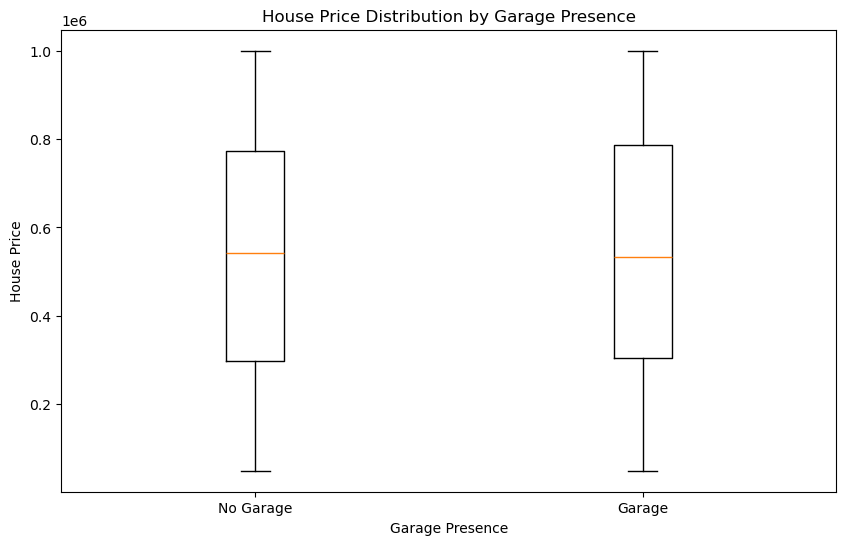

In [44]:
# Prepare data for boxplot: list of house prices for each garage category
garage_price_data = [
    house_data[house_data['Garage'] == 'No']['Price'],
    house_data[house_data['Garage'] == 'Yes']['Price']
]

# Plotting the boxplot for house prices based on garage presence
plt.figure(figsize=(10, 6))
plt.boxplot(garage_price_data, labels=['No Garage', 'Garage'], 
            flierprops=dict(marker='o', color='red', markersize=8))

# Add titles and labels
plt.title('House Price Distribution by Garage Presence')
plt.xlabel('Garage Presence')
plt.ylabel('House Price')

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Box_plot.png', format='png', dpi=300)

# Show the plot
plt.show()


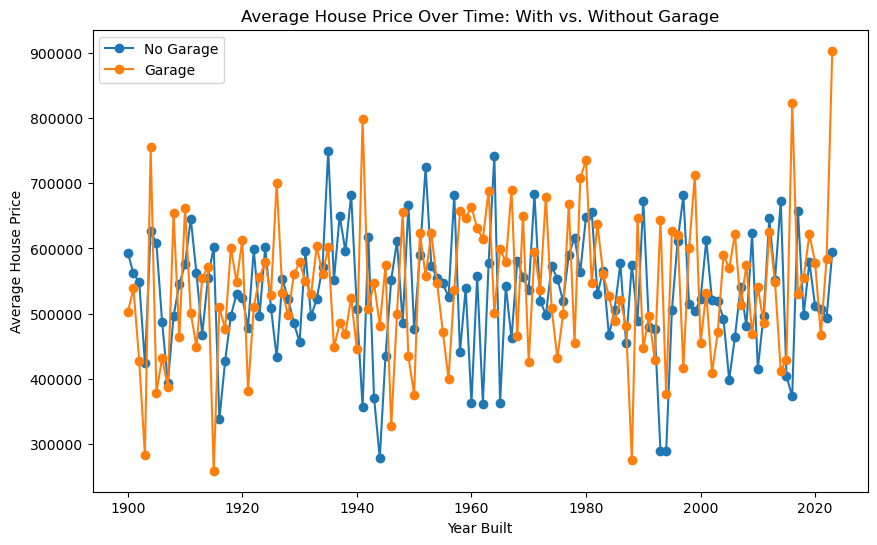

In [45]:
# Calculate the average house price by year built for each garage category
avg_price_by_year = house_data.groupby(['YearBuilt', 'Garage'])['Price'].mean().reset_index()

# Filter data for houses with and without garages
no_garage_data = avg_price_by_year[avg_price_by_year['Garage'] == 'No']
garage_data = avg_price_by_year[avg_price_by_year['Garage'] == 'Yes']

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(no_garage_data['YearBuilt'], no_garage_data['Price'], label='No Garage', marker='o')
plt.plot(garage_data['YearBuilt'], garage_data['Price'], label='Garage', marker='o')

# Add titles and labels
plt.title('Average House Price Over Time: With vs. Without Garage')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Line_plot_Total.png', format='png', dpi=300)

# Show the plot
plt.show()


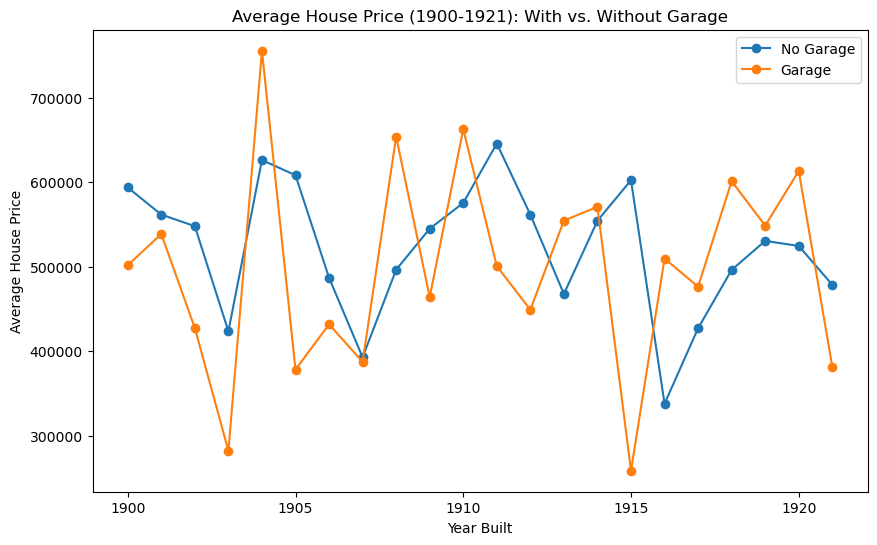

In [46]:
# Filter data for houses built from 1900 to 1920
early_data = avg_price_by_year[(avg_price_by_year['YearBuilt'] >= 1900) & (avg_price_by_year['YearBuilt'] <= 1921)]

# Filter for houses with and without garages
early_no_garage = early_data[early_data['Garage'] == 'No']
early_garage = early_data[early_data['Garage'] == 'Yes']

# Plotting the line plot for early years
plt.figure(figsize=(10, 6))
plt.plot(early_no_garage['YearBuilt'], early_no_garage['Price'], label='No Garage', marker='o')
plt.plot(early_garage['YearBuilt'], early_garage['Price'], label='Garage', marker='o')

# Add titles and labels
plt.title('Average House Price (1900-1921): With vs. Without Garage')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Line_plot_Head.png', format='png', dpi=300)

# Show the plot
plt.show()


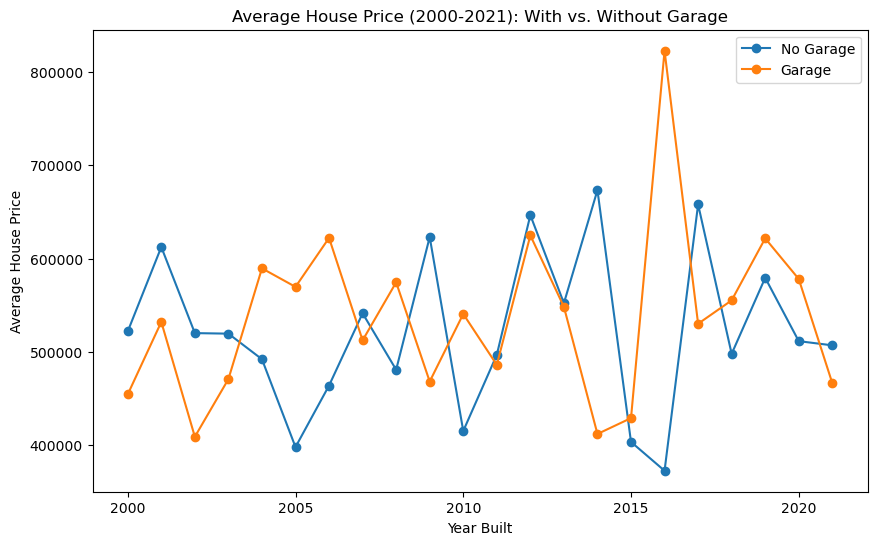

In [47]:
# Filter data for houses built from 2000 to 2020
recent_data = avg_price_by_year[(avg_price_by_year['YearBuilt'] >= 2000) & (avg_price_by_year['YearBuilt'] <= 2021)]

# Filter for houses with and without garages
recent_no_garage = recent_data[recent_data['Garage'] == 'No']
recent_garage = recent_data[recent_data['Garage'] == 'Yes']

# Plotting the line plot for recent years
plt.figure(figsize=(10, 6))
plt.plot(recent_no_garage['YearBuilt'], recent_no_garage['Price'], label='No Garage', marker='o')
plt.plot(recent_garage['YearBuilt'], recent_garage['Price'], label='Garage', marker='o')

# Add titles and labels
plt.title('Average House Price (2000-2021): With vs. Without Garage')
plt.xlabel('Year Built')
plt.ylabel('Average House Price')
plt.legend()

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Line_plot_Tail.png', format='png', dpi=300)

# Show the plot
plt.show()


In [48]:
# Separate house prices for houses with garages and without garages
garage_prices = house_data[house_data['Garage'] == 'Yes']['Price']
no_garage_prices = house_data[house_data['Garage'] == 'No']['Price']

# Perform a one-way ANOVA test to compare the mean prices between the two groups
st.f_oneway(garage_prices, no_garage_prices)

F_onewayResult(statistic=0.016139607479556336, pvalue=0.898920134240627)

In [49]:
# Calculate observed data: count of houses with and without a garage
observed = pd.Series([house_data['Garage'].value_counts()['Yes'], 
house_data['Garage'].value_counts()['No']], 
index=["Garage", "No Garage"])

# Create a DataFrame for better visualization
df = pd.DataFrame([observed]).T

# Add a column for expected values (assuming equal distribution)
df[1] = observed.sum() / 2

# Rename the columns
df.columns = ["observed", "expected"]

# View the DataFrame
df

,observed,expected
Garage,962,1000.0
No Garage,1038,1000.0


In [50]:
# Calculate the critical value at 95% confidence level with 1 degree of freedom
critical_value = st.chi2.ppf(q=0.95, df=1)

# Print the critical value
print(f"The critical value: {critical_value}")


The critical value: 3.841458820694124


In [51]:
# Run the Chi-Square test
st.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=2.888, pvalue=0.08924164599420346)

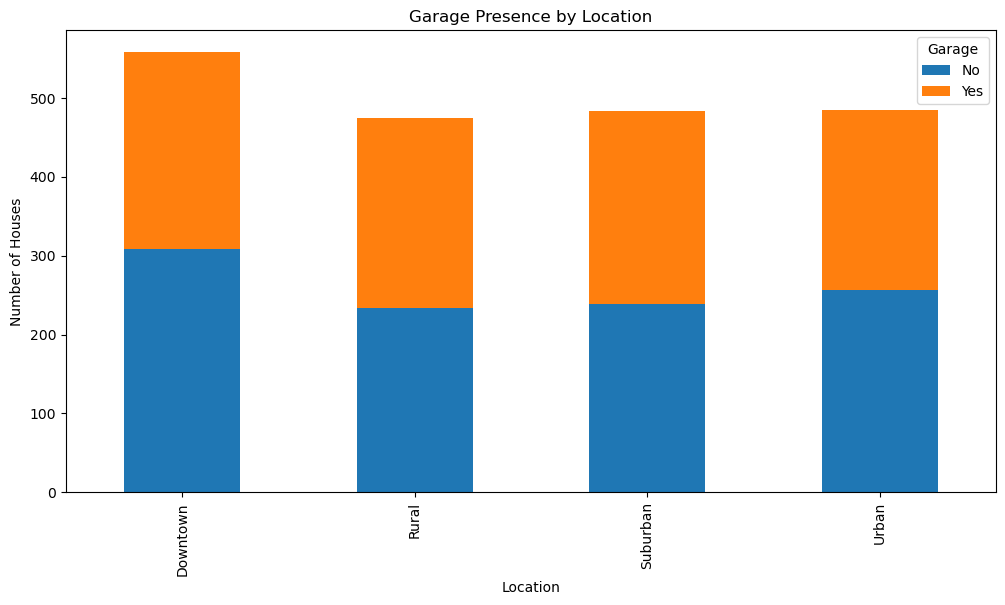

In [52]:
# Group data by 'Location' and 'Garage' to see distribution
garage_by_location = house_data.groupby(['Location', 'Garage']).size().unstack().fillna(0)

# Plotting a stacked bar chart to visualize garage presence by location
garage_by_location.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Garage Presence by Location')
plt.xlabel('Location')
plt.ylabel('Number of Houses')

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Stacked_Bar_plot.png', format='png', dpi=300)

# Show the plot
plt.show()


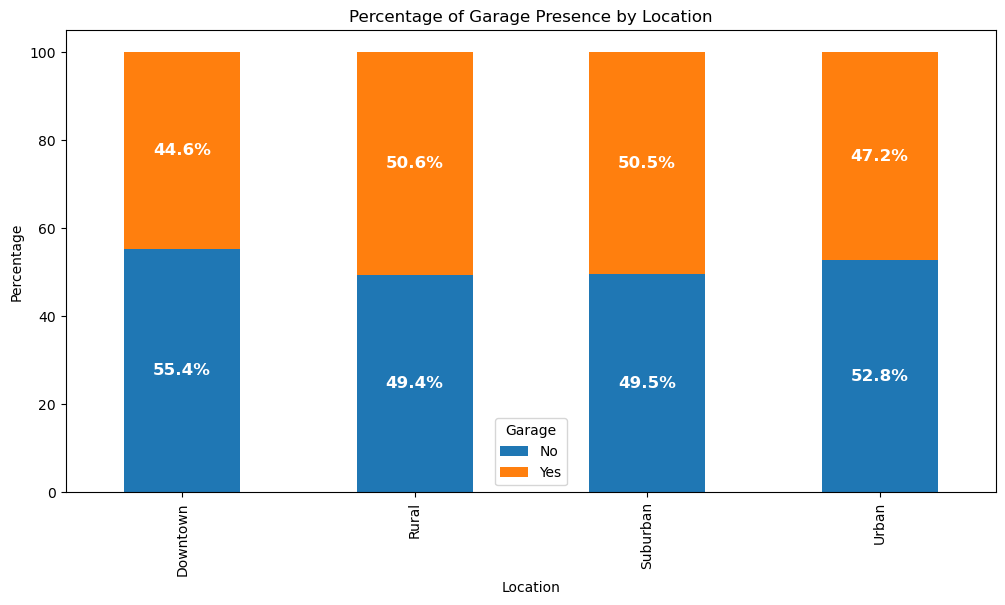

In [53]:
# Calculate percentage distribution of garage presence by location
garage_percent = garage_by_location.div(garage_by_location.sum(axis=1), axis=0) * 100

# Plot the percentage distribution
ax = garage_percent.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Garage Presence by Location')
plt.xlabel('Location')
plt.ylabel('Percentage')
plt.legend(title='Garage')

# Add percentage labels on the bars
for location in range(len(garage_percent.index)):
    cumulative_sum = 0  # Track cumulative sum of the percentages for positioning the labels
    for garage in range(len(garage_percent.columns)):
        percentage = garage_percent.iloc[location, garage]
        if percentage > 0:  # Only show non-zero values
            cumulative_sum += percentage
            plt.text(
                location, 
                cumulative_sum - (percentage / 2),  # Adjust the label position
                f'{percentage:.1f}%', 
                ha='center', 
                va='center', 
                color='white', 
                fontsize=12, 
                fontweight='bold'
            )

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Percentage_Stacked_Bar_plot.png', format='png', dpi=300)

# Show the plot
plt.show()


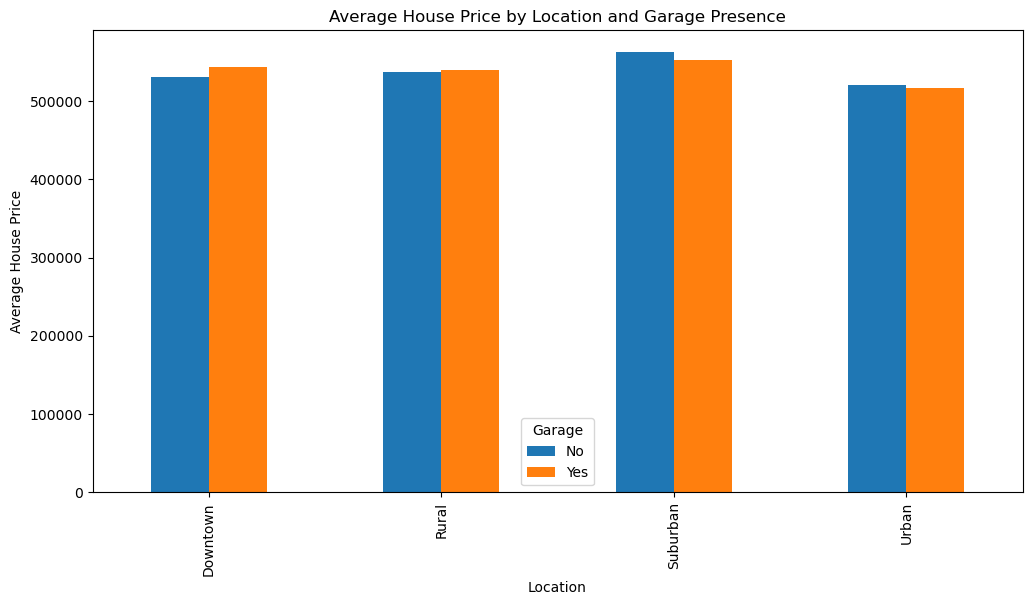

In [54]:
# Group by location and garage presence to calculate average prices
avg_price_loc_garage = house_data.groupby(['Location', 'Garage'])['Price'].mean().unstack()

# Plot the average house price by location and garage presence
avg_price_loc_garage.plot(kind='bar', figsize=(12, 6))
plt.title('Average House Price by Location and Garage Presence')
plt.xlabel('Location')
plt.ylabel('Average House Price')

# Save the plot to your desired folder
plt.savefig('C:/Users/somay/OneDrive/Boot Camp/Class Activity/Project 1/Group_9_Project_1/Plots/Location_Garage_Bar_plot.png', format='png', dpi=300)

# Show the plot
plt.show()


In [55]:
# Our data should be uniquely identified by House ID, number of bedrooms, location, 
# floors, yearbuilt, condition, and price to make sure there are no duplicates in the data
house_bedroom = house_df.loc[house_df.duplicated(subset=["Id", "Bedrooms", "Location", "Floors", "YearBuilt",
                                                         "Condition", "Price",]),"Id"].unique()
house_bedroom

array([], dtype=int64)

In [56]:
# Create a clean DataFrame by having House Id, number of Bedrooms, Location, Floors, 
# YearBuilt, Condition, and Price as columns
house_bedroom_df = house_df[["Id", "Bedrooms", "Location", "Floors", "YearBuilt",
                             "Condition", "Price"]]
house_bedroom_df.head()

,Id,Bedrooms,Location,Floors,YearBuilt,Condition,Price
0,1,5,Downtown,3,1970,Excellent,149919
1,2,5,Downtown,3,1958,Excellent,424998
2,3,2,Downtown,3,1938,Good,266746
3,4,4,Suburban,2,1902,Fair,244020
4,5,1,Downtown,2,1975,Fair,636056


In [57]:
# Grouping the number of bedrooms per house to see price differences
bedroom_dict = {}

# Loop through each unique bedroom count
for bedroom_count in house_bedroom_df["Bedrooms"].unique():
    # Filter the DataFrame for the current bedroom count
    houses = house_bedroom_df[house_bedroom_df["Bedrooms"] == bedroom_count]
    # Store the house details in the dictionary
    bedroom_dict[bedroom_count] = houses[["Id", "Location", "Floors", "YearBuilt", "Condition", "Price"]]

# Display the results for each bedroom count
for bedroom_count, data in bedroom_dict.items():
    print(f"\nHouses with {bedroom_count} bedrooms:")
    print(data)


Houses with 5 bedrooms:
        Id  Location  Floors  YearBuilt  Condition   Price
0        1  Downtown       3       1970  Excellent  149919
1        2  Downtown       3       1958  Excellent  424998
19      20  Downtown       2       2016  Excellent  218767
24      25     Urban       3       1900  Excellent  688668
25      26     Urban       2       1959       Good  527032
...    ...       ...     ...        ...        ...     ...
1989  1990     Rural       3       1919  Excellent   60002
1995  1996  Suburban       3       1923       Poor  295620
1996  1997  Suburban       1       2019       Poor  580929
1997  1998     Rural       2       1903       Poor  476925
1999  2000  Suburban       3       1903       Fair  482525

[403 rows x 6 columns]

Houses with 2 bedrooms:
        Id  Location  Floors  YearBuilt  Condition   Price
2        3  Downtown       3       1938       Good  266746
7        8  Suburban       1       1925       Good  594893
8        9     Rural       1       1932  

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of bedrooms and prices

# mean, median, variance, standard deviation, and SEM of the prices per bedroom count.
# Assemble the resulting series into a single summary DataFrame.
# Grouping by the number of bedrooms
bedroom_groups = house_bedroom_df.groupby("Bedrooms")["Price"]

# Calculating summary statistics
mean_price = bedroom_groups.mean()
median_price = bedroom_groups.median()
price_variance = bedroom_groups.var()
price_std_dev = bedroom_groups.std()
price_sem = bedroom_groups.sem()

# Creating a summary DataFrame
summary_statistics_df = pd.DataFrame({
    "Mean Price": mean_price,
    "Median Price": median_price, 
    "Price Variance": price_variance,
    "Price Std. Dev.": price_std_dev,
    "Price Std. Err.": price_sem
})

summary_statistics_df

,Mean Price,Median Price,Price Variance,Price Std. Dev.,Price Std. Err.
Bedrooms,,,,,
1,530561.622010,537497.5,7.914835e+10,281333.169201,13760.455102
2,545546.521739,528791.0,7.868252e+10,280504.042087,14622.283994
3,546977.894089,557577.0,7.218170e+10,268666.515802,13333.695299
4,533696.930864,535119.0,8.042240e+10,283588.429642,14091.622362
5,532500.124069,526657.0,7.225753e+10,268807.610292,13390.260835


In [59]:
# Grouping by bedroom count
bedroom_groups = house_bedroom_df.groupby("Bedrooms")["Price"]

# Calculating quartiles
q1 = bedroom_groups.quantile(0.25)
median = bedroom_groups.median()
q3 = bedroom_groups.quantile(0.75)
iqr = q3 - q1

# Creating a DataFrame to display the quartiles and IQR
quartiles_df = pd.DataFrame({
    "1st Quartile": q1,
    "Median": median,
    "3rd Quartile": q3,
    "Interquartile Range (IQR)": iqr
})

quartiles_df

,1st Quartile,Median,3rd Quartile,Interquartile Range (IQR)
Bedrooms,,,,
1,282167.0,537497.5,771193.25,489026.25
2,302971.0,528791.0,798427.00,495456.00
3,317008.0,557577.0,776850.50,459842.50
4,290140.0,535119.0,786091.00,495951.00
5,309730.5,526657.0,762441.50,452711.00


<Figure size 1000x600 with 0 Axes>

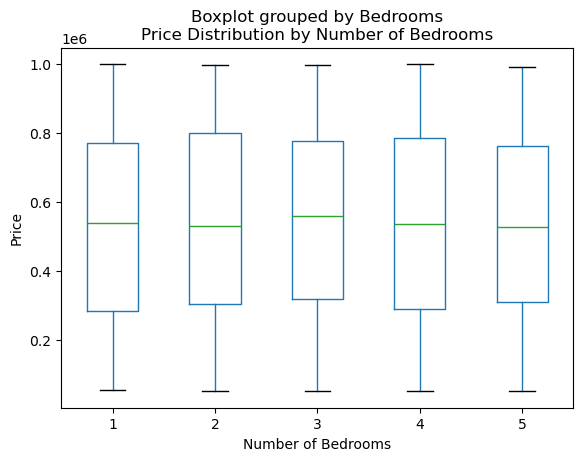

In [60]:
# Plotting a box plot to show price distribution by bedroom count
plt.figure(figsize=(10, 6))
house_bedroom_df.boxplot(column="Price", by="Bedrooms", grid=False)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Price Distribution by Number of Bedrooms")
plt.show()

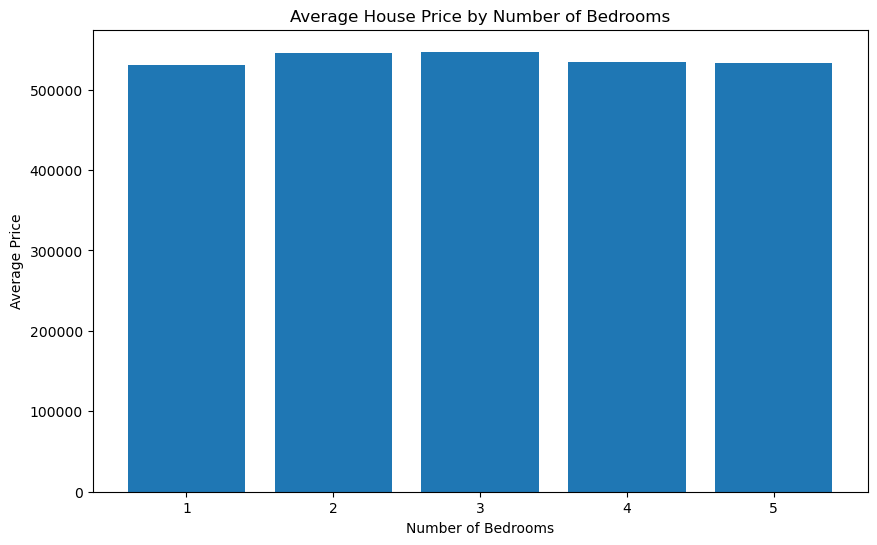

In [61]:
# Calculate the average price by bedroom count
average_prices = house_bedroom_df.groupby("Bedrooms")["Price"].mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(average_prices.index, average_prices.values)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.title("Average House Price by Number of Bedrooms")
plt.show()

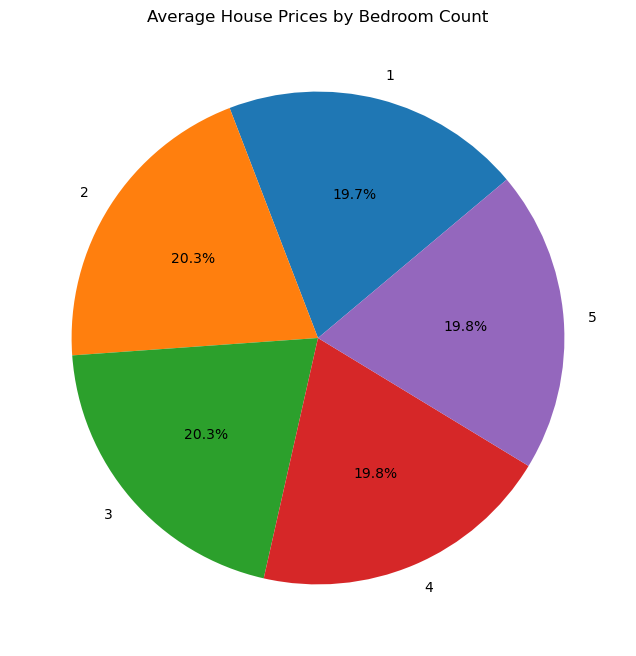

In [62]:
# Calculate the average price by bedroom count
mean_price = house_bedroom_df.groupby("Bedrooms")["Price"].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(mean_price, labels=mean_price.index, autopct="%1.1f%%", startangle=40)
plt.title("Average House Prices by Bedroom Count")
plt.show()

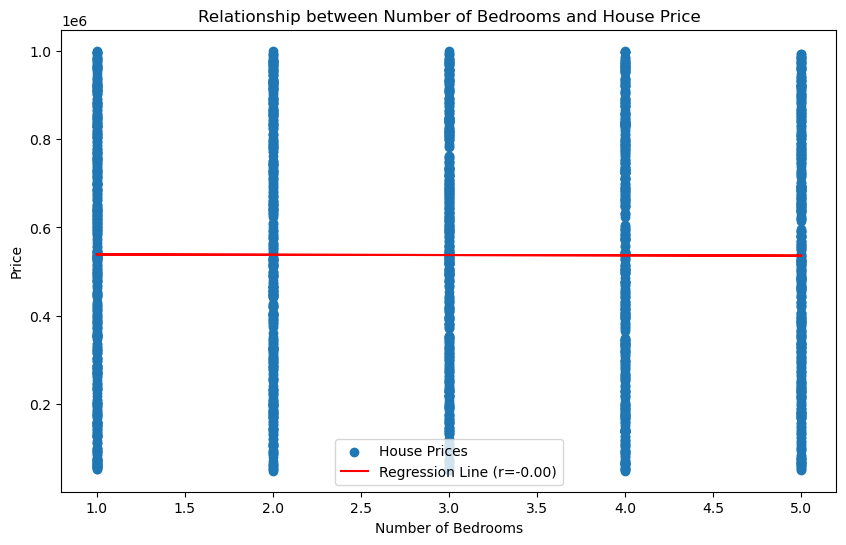

Correlation coefficient (r): -0.00
P-value: 8.77e-01


In [63]:
# Extract bedroom count and price data
bedroom_count = house_bedroom_df["Bedrooms"]
prices = house_bedroom_df["Price"]

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(bedroom_count, prices)
regression_line = slope * bedroom_count + intercept

# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(bedroom_count, prices, label="House Prices")
plt.plot(bedroom_count, regression_line, color="red", label=f"Regression Line (r={r_value:.2f})")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Relationship between Number of Bedrooms and House Price")
plt.legend()
plt.show()

# Displaying correlation
print(f"Correlation coefficient (r): {r_value:.2f}")
print(f"P-value: {p_value:.2e}")

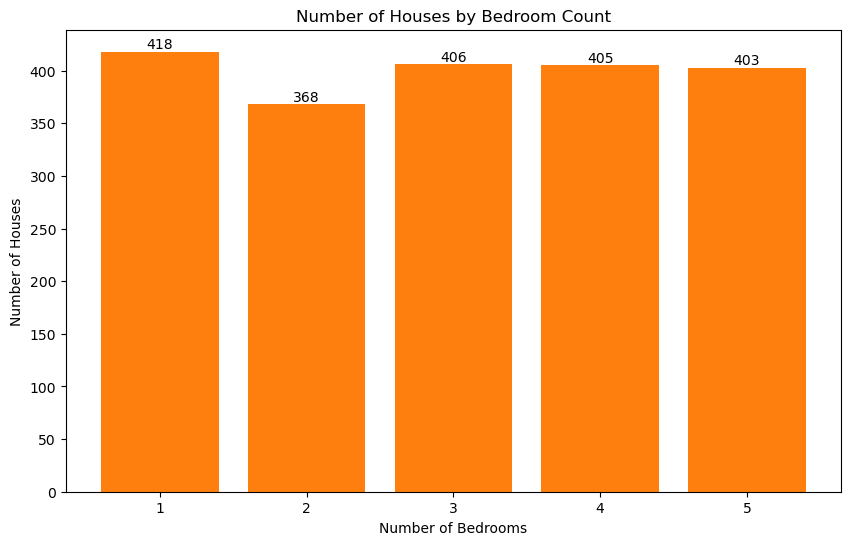

In [64]:
# Count the number of houses observed for each bedroom count
house_counts = house_bedroom_df["Bedrooms"].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(house_counts.index, house_counts.values)

# Add labels to the bars
for bar in bars:
    val = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, val, int(val), ha="center", va="bottom")
plt.bar(house_counts.index, house_counts.values)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Houses")
plt.title("Number of Houses by Bedroom Count")
plt.show()